<a href="https://colab.research.google.com/github/mgnarag/painting_restoration/blob/main/color%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls drive/My\ Drive
file_path = "/content/drive/MyDrive/Baumgartner screenshots/"

'107.1 syllabus 1SAY1920 FINAL.gdoc'
 11_input_flipped_horizontal.png
 11_input_flipped_vertical.jpg
 11_input.png
 11_input_rotated_180_flipped_horizontal.png
 11_input_rotated_180_flipped_vertical.jpg
 11_input_rotated_180.png
 11_input_rotated_270_flipped_horizontal.png
 11_input_rotated_270_flipped_vertical.jpg
 11_input_rotated_270.png
 11_input_rotated_90_flipped_horizontal.png
 11_input_rotated_90_flipped_vertical.jpg
 11_input_rotated_90.png
 11_output_flipped_horizontal.png
 11_output_flipped_vertical.jpg
 11_output.png
 11_output_rotated_180_flipped_horizontal.png
 11_output_rotated_180_flipped_vertical.jpg
 11_output_rotated_180.png
 11_output_rotated_270_flipped_horizontal.png
 11_output_rotated_270_flipped_vertical.jpg
 11_output_rotated_270.png
 11_output_rotated_90_flipped_horizontal.png
 11_output_rotated_90_flipped_vertical.jpg
 11_output_rotated_90.png
'1C-01 Narag et al (1).pdf'
'1C-01 Narag et al.pdf'
'1FA971504AC646559D05A8ED6341AFB3[1025340].png'
'1H-04 Narag et a

## Installing packages

In [3]:
import time
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from PIL import Image, ImageOps
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

import cv2
from skimage import color

from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876
from sklearn.model_selection import train_test_split

## Defining functions

In [4]:
def rgb_lab_normalized(im):
    rgb_array = np.array(im) # Convert to numpy array
    rgb_array_normalized = rgb_array / 255.0 # Normalize RGB values from 0 to 1
    lab_array_normalized = color.rgb2lab(rgb_array_normalized) # Convert RGB to LAB colorspace
    lab_array_normalized[..., 0] = (lab_array_normalized[..., 0]) / 100.0 # Scale LAB values to range [0, 1]
    lab_array_normalized[..., 1] = (lab_array_normalized[..., 1] + 128) / 255.0
    lab_array_normalized[..., 2] = (lab_array_normalized[..., 2] + 128) / 255.0
    lab_image_normalized = Image.fromarray((lab_array_normalized * 255).astype(np.uint8), mode='LAB')# Convert LAB array back to image
    return lab_image_normalized

## Testing the model

### **Model RGB:**

In [5]:
n_size = 8
size = 8

def rgb_L_ab(rgb_image, test_L):
    lab_array = color.rgb2lab(np.array(rgb_image))# Convert RGB to LAB colorspace
    lab_array[..., 0] = test_L #Change L channel to input
    rgb_array = color.lab2rgb(lab_array)# Convert back LAB to RGB colorspace
    rgb_array = (rgb_array*255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_array = Image.fromarray(rgb_array, mode='RGB')# Convert RGB array back to image
    return rgb_array

autoencoder = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_rgb')

input_folder_path = file_path+ "Testing/portion only/color test/"
input_files = sorted(os.listdir(input_folder_path))

for index, image_file in enumerate(input_files):
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    test_L = color.rgb2lab(np.array(image))
    test_L = test_L[..., 0]
    image = np.array(image).astype(np.float32) / 255.0# Convert image to numpy array and scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)# Expand dimensions to match the expected input shape (1, 8, 8, 3)

    decoded_imgs = autoencoder.predict(image)
    final = (decoded_imgs*255).astype('uint8')

    #----------------TEST ON FULL RGB--------------------#
    final_rgb = final
    final_rgb = np.squeeze(final_rgb)
    reconstructed_rgb = Image.fromarray(final_rgb)
    reconstructed_rgb.save(file_path + "Testing/portion only/color test out/"+"Method_1_"+image_file)


    #plt.figure(), plt.imshow(reconstructed_rgb)

    #----------------TEST ON L from input and AB from convert RGB2LAB of model--------------------#
    final_lab = rgb_L_ab(final_rgb, test_L)
    final_lab = np.squeeze(final_lab)
    reconstructed_lab = Image.fromarray(final_lab)
    reconstructed_lab.save(file_path + "Testing/portion only/color test out/"+"Method_2_"+image_file)
    #plt.figure(), plt.imshow(reconstructed_lab)

1/1 [==============================] - 0s 21ms/step


### **Model LAB:**

In [6]:
from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876

n_size = 8
size = n_size

def lab_rgb_unnormalized(lab_image):
    lab_array = np.array(lab_image/255)# Convert LAB image to numpy array
    lab_array[..., 0] = lab_array[..., 0] * 100.0# Scale LAB values back to their original ranges
    lab_array[..., 1] = (lab_array[..., 1] * 255.0) - 128
    lab_array[..., 2] = (lab_array[..., 2] * 255.0) - 128
    rgb_array_unnormalized = color.lab2rgb(lab_array)# Convert LAB to RGB colorspace
    rgb_array_unnormalized = (rgb_array_unnormalized * 255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_image_unnormalized = Image.fromarray(rgb_array_unnormalized, mode='RGB')# Convert RGB array back to image
    return rgb_image_unnormalized

def AB_rgb_unnormalized(lab_image, test_L):
    lab_array = np.array(lab_image/255)# Convert LAB image to numpy array
    lab_array[..., 0] = test_L #replacing L from the original input
    lab_array[..., 1] = (lab_array[..., 1] * 255.0) - 128
    lab_array[..., 2] = (lab_array[..., 2] * 255.0) - 128
    rgb_array_unnormalized = color.lab2rgb(lab_array)# Convert LAB to RGB colorspace
    rgb_array_unnormalized = (rgb_array_unnormalized * 255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_image_unnormalized = Image.fromarray(rgb_array_unnormalized, mode='RGB')# Convert RGB array back to image
    return rgb_image_unnormalized


autoencoder = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_lab')

input_folder_path = file_path+ "Testing/portion only/color test/"
input_files = sorted(os.listdir(input_folder_path))

for index, image_file in enumerate(input_files):
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    test_L = color.rgb2lab(np.array(image))
    test_L = test_L[..., 0]
    image = rgb_lab_normalized(image)
    image = np.array(image).astype(np.float32) / 255.0# Convert image to numpy array and scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)# Expand dimensions to match the expected input shape (1, 8, 8, 3)

    decoded_imgs = autoencoder.predict(image)
    final = (decoded_imgs*255).astype('uint8')

    #----------------TEST ON FULL LAB--------------------#
    final_LAB = lab_rgb_unnormalized(np.squeeze(final))
    final_LAB = np.squeeze(final_LAB)
    reconstructed_LAB = Image.fromarray(final_LAB)
    reconstructed_LAB.save(file_path + "Testing/portion only/color test out/"+"Method_3_"+image_file)
    #plt.figure(), plt.imshow(reconstructed_LAB)

    #----------------TEST ON L from input and AB from model--------------------#
    final_L_AB = AB_rgb_unnormalized(np.squeeze(final), test_L)
    final_L_AB = np.squeeze(final_L_AB)
    reconstructed_L_AB = Image.fromarray(final_L_AB)
    reconstructed_L_AB.save(file_path + "Testing/portion only/color test out/"+"Method_4_"+image_file)
    #plt.figure(), plt.imshow(reconstructed_L_AB)

1/1 [==============================] - 0s 24ms/step


### **Model AB**

In [7]:
from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876

n_size = 8
size = n_size

def rgb_lab_normalized(im):
    rgb_array = np.array(im) # Convert to numpy array
    rgb_array_normalized = rgb_array / 255.0 # Normalize RGB values from 0 to 1
    lab_array_normalized = color.rgb2lab(rgb_array_normalized) # Convert RGB to LAB colorspace
    lab_array_normalized[..., 0] = (lab_array_normalized[..., 0]) / 100.0 # Scale LAB values to range [0, 1]
    lab_array_normalized[..., 1] = (lab_array_normalized[..., 1] + 128) / 255.0
    lab_array_normalized[..., 2] = (lab_array_normalized[..., 2] + 128) / 255.0
    lab_image_normalized = Image.fromarray((lab_array_normalized * 255).astype(np.uint8), mode='LAB')# Convert LAB array back to image
    return lab_image_normalized

def AB_rgb_unnormalized(ab_image, test_L):
    ab_array = np.array(ab_image)/255# Convert LAB image to numpy array
    ab_array[..., 0] = (ab_array[..., 0] * 255.0) - 128
    ab_array[..., 1] = (ab_array[..., 1] * 255.0) - 128
    LAB_array = np.dstack((test_L, ab_array[:,:,0], ab_array[:,:,1]))
    rgb_array_unnormalized = color.lab2rgb(LAB_array)# Convert LAB to RGB colorspace
    rgb_array_unnormalized = (rgb_array_unnormalized * 255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_image_unnormalized = Image.fromarray(rgb_array_unnormalized, mode='RGB')# Convert RGB array back to image
    return rgb_image_unnormalized

autoencoder = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_ab')

input_folder_path = file_path+ "Testing/portion only/color test/"
input_files = sorted(os.listdir(input_folder_path))

for index, image_file in enumerate(input_files):
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    test_L = color.rgb2lab(np.array(image))
    test_L = np.array(test_L[..., 0]).astype('uint8')
    image = rgb_lab_normalized(image)
    image = np.array(image).astype(np.float32) / 255.0# Convert image to numpy array and scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)# Expand dimensions to match the expected input shape (1, 8, 8, 3)

    decoded_imgs = autoencoder.predict(image[:,:,:,1:3])
    final = (decoded_imgs*255).astype('uint8')

    #----------------TEST ON L from input and AB from model--------------------#
    final_L_AB = AB_rgb_unnormalized(np.squeeze(final), test_L)
    final_L_AB = np.squeeze(final_L_AB)
    reconstructed_L_AB = Image.fromarray(final_L_AB)
    reconstructed_L_AB.save(file_path + "Testing/portion only/color test out/"+"Method_5_"+image_file)
    #plt.figure(), plt.imshow(reconstructed_L_AB)

1/1 [==============================] - 0s 23ms/step


### **Model AB plus Model L**

In [8]:

from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876

n_size = 8
size = 8

def rgb_lab_normalized(im):
    rgb_array = np.array(im) # Convert to numpy array
    rgb_array_normalized = rgb_array / 255.0 # Normalize RGB values from 0 to 1
    lab_array_normalized = color.rgb2lab(rgb_array_normalized) # Convert RGB to LAB colorspace
    lab_array_normalized[..., 0] = (lab_array_normalized[..., 0]) / 100.0 # Scale LAB values to range [0, 1]
    lab_array_normalized[..., 1] = (lab_array_normalized[..., 1] + 128) / 255.0
    lab_array_normalized[..., 2] = (lab_array_normalized[..., 2] + 128) / 255.0
    lab_image_normalized = Image.fromarray((lab_array_normalized * 255).astype(np.uint8), mode='LAB')# Convert LAB array back to image
    return lab_image_normalized

def L_AB_rgb_unnormalized(ab_image, final_L):
    ab_image = ab_image/255.0
    final_L = final_L/255.0
    final_L[..., 0] = final_L[..., 0]*100.0
    ab_image[..., 0] = (ab_image[..., 0] * 255.0) - 128
    ab_image[..., 1] = (ab_image[..., 1] * 255.0) - 128
    LAB_array = np.dstack((final_L, ab_image[:,:,0], ab_image[:,:,1]))
    rgb_array_unnormalized = color.lab2rgb(LAB_array)# Convert LAB to RGB colorspace
    rgb_array_unnormalized = (rgb_array_unnormalized * 255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_image_unnormalized = Image.fromarray(rgb_array_unnormalized, mode='RGB')# Convert RGB array back to image
    return rgb_image_unnormalized


#----------------GETTING L--------------------#
autoencoder_L = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_L')
autoencoder_ab = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_ab')

input_folder_path = file_path+ "Testing/portion only/color test/"
input_files = sorted(os.listdir(input_folder_path))

for index, image_file in enumerate(input_files):
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    image = rgb_lab_normalized(image)
    image = np.array(image).astype(np.float32) / 255.0# Convert image to numpy array and scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)# Expand dimensions to match the expected input shape (1, 8, 8, 3)

    decoded_imgs = autoencoder_L.predict(image[:,:,:,0:1])
    final_L = (decoded_imgs*255).astype('uint8')

#----------------GETTING AB--------------------#
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    image = rgb_lab_normalized(image)
    image = np.array(image).astype(np.float32) / 255.0# Convert image to numpy array and scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)# Expand dimensions to match the expected input shape (1, 8, 8, 3)

    decoded_imgs = autoencoder_ab.predict(image[:,:,:,1:3])
    final_ab = (decoded_imgs*255).astype('uint8')


    #----------------TEST ON L from model and AB from model--------------------#
    final_L_AB = L_AB_rgb_unnormalized(np.squeeze(final_ab), np.squeeze(final_L, axis=0))
    final_L_AB = np.squeeze(final_L_AB)
    reconstructed_L_AB = Image.fromarray(final_L_AB)
    reconstructed_L_AB.save(file_path + "Testing/portion only/color test out/"+"Method_6_"+image_file)
    #plt.figure(), plt.imshow(reconstructed_L_AB)

1/1 [==============================] - 0s 21ms/step


## Compute delta E color error tendency

In [10]:
import numpy as np
import cv2
from skimage import io

def delta_e_cie2000(lab1, lab2):
    # Constants
    kL = 1
    kC = 1
    kH = 1

    L1, a1, b1 = lab1
    L2, a2, b2 = lab2

    # CIE 2000 formula
    L_bar_prime = 0.5 * (L1 + L2)
    C1 = np.sqrt(a1**2 + b1**2)
    C2 = np.sqrt(a2**2 + b2**2)
    C_bar = 0.5 * (C1 + C2)
    C_bar7 = C_bar**7

    G = 0.5 * (1 - np.sqrt(C_bar7 / (C_bar7 + 25**7)))
    a1_prime = (1 + G) * a1
    a2_prime = (1 + G) * a2

    C1_prime = np.sqrt(a1_prime**2 + b1**2)
    C2_prime = np.sqrt(a2_prime**2 + b2**2)
    C_bar_prime = 0.5 * (C1_prime + C2_prime)

    h1_prime = np.degrees(np.arctan2(b1, a1_prime)) % 360
    h2_prime = np.degrees(np.arctan2(b2, a2_prime)) % 360

    H_bar_prime = h1_prime + h2_prime
    if abs(h1_prime - h2_prime) > 180:
        H_bar_prime += 360
    H_bar_prime *= 0.5

    T = 1 - 0.17 * np.cos(np.radians(H_bar_prime - 30)) \
        + 0.24 * np.cos(np.radians(2 * H_bar_prime)) \
        + 0.32 * np.cos(np.radians(3 * H_bar_prime + 6)) \
        - 0.20 * np.cos(np.radians(4 * H_bar_prime - 63))

    delta_h_prime = h2_prime - h1_prime
    if abs(delta_h_prime) > 180:
        if h2_prime <= h1_prime:
            delta_h_prime += 360
        else:
            delta_h_prime -= 360

    delta_L_prime = L2 - L1
    delta_C_prime = C2_prime - C1_prime
    delta_H_prime = 2 * np.sqrt(C1_prime * C2_prime) * np.sin(np.radians(delta_h_prime * 0.5))

    S_L = 1 + ((0.015 * (L_bar_prime - 50) ** 2) / np.sqrt(20 + (L_bar_prime - 50) ** 2))
    S_C = 1 + 0.045 * C_bar_prime
    S_H = 1 + 0.015 * C_bar_prime * T

    delta_theta = 30 * np.exp(-(((H_bar_prime - 275) / 25) ** 2))
    R_C = 2 * np.sqrt(C_bar7 / (C_bar7 + 25**7))
    R_T = -R_C * np.sin(2 * np.radians(delta_theta))

    delta_E = np.sqrt(
        (delta_L_prime / (kL * S_L)) ** 2 +
        (delta_C_prime / (kC * S_C)) ** 2 +
        (delta_H_prime / (kH * S_H)) ** 2 +
        R_T * (delta_C_prime / (kC * S_C)) * (delta_H_prime / (kH * S_H))
    )

    return delta_E


def color_error(image1_path,image2_path):
    image1 = io.imread(image1_path)
    image2 = io.imread(image2_path)
    # Ensure images are in uint8 format
    if image1.dtype != np.uint8:
        image1 = (image1 * 255).astype(np.uint8)
    if image2.dtype != np.uint8:
        image2 = (image2 * 255).astype(np.uint8)
    # Remove the alpha channel if it exists
    if image1.shape[-1] == 4:
        image1 = image1[..., :3]
    if image2.shape[-1] == 4:
        image2 = image2[..., :3]
    # Ensure the images have the same dimensions
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions")
    # Convert images to LAB color space
    image1_lab = cv2.cvtColor(image1, cv2.COLOR_RGB2LAB)
    image2_lab = cv2.cvtColor(image2, cv2.COLOR_RGB2LAB)

    # Scale LAB values to match theoretical ranges
    image1_lab = np.copy(image1_lab).astype(np.float64)
    image2_lab = np.copy(image2_lab).astype(np.float64)

    image1_lab[:, :, 0] = image1_lab[:, :, 0] * (100 / 255)  # L channel
    image1_lab[:, :, 1] = image1_lab[:, :, 1] - 128          # a channel
    image1_lab[:, :, 2] = image1_lab[:, :, 2] - 128          # b channel

    image2_lab[:, :, 0] = image2_lab[:, :, 0] * (100 / 255)  # L channel
    image2_lab[:, :, 1] = image2_lab[:, :, 1] - 128          # a channel
    image2_lab[:, :, 2] = image2_lab[:, :, 2] - 128          # b channel

    # Flatten the images for easier processing
    image1_lab_flat = image1_lab.reshape((-1, 3))
    image2_lab_flat = image2_lab.reshape((-1, 3))

    # Compute Delta E 2000 for each pair of pixels
    delta_e_values = np.array([delta_e_cie2000(lab1, lab2) for lab1, lab2 in zip(image1_lab_flat, image2_lab_flat)])
    delta_e_values_mean = np.mean(delta_e_values)
    # Reshape the delta_e_values to match the image dimensions, if u wanna plot
    #delta_e_image = delta_e_values.reshape(image1_lab.shape[:2])
    return delta_e_values_mean

In [28]:
groundtruth_folder_path = file_path+ "Testing/portion only/color test gt/"
gt_files = sorted(os.listdir(groundtruth_folder_path))

out_methods_folder_path = file_path+ "Testing/portion only/color test out/"
out_files = sorted(os.listdir(out_methods_folder_path))

method_scores = []
for method in range(1,7):
  patch_scores = []
  for index in range(1,len(gt_files)+1):
      gt_path = groundtruth_folder_path + str(index) + '_output.png'
      out_path_1 = out_methods_folder_path + 'Method_' + str(method) +'_' + str(index) + '_input.png'
      col_er = color_error(gt_path,out_path_1)
      patch_scores.append(col_er)
  patch_scores.append(np.mean(patch_scores))
  method_scores.append(patch_scores)


print(np.transpose(method_scores))

headers = ['Method 1', 'Method 2', 'Method 3','Method 4', 'Method 5', 'Method 6']
row_labels  = ['patch 1', 'patch 2', 'patch 3', 'patch 4', 'patch 5','patch 6', 'patch 7', 'patch 8', 'patch 9', 'patch 10', 'mean']
df = pd.DataFrame(np.transpose(method_scores), columns=headers, index=row_labels)
df.to_csv(file_path+ "Testing/portion only/" + 'delta E scores.csv')

[[ 3.33088927  9.22993217  4.19704026  8.87304721  9.0710971   1.74086482]
 [ 4.16699625  5.84282112  6.25068192  6.36880062  5.93772449  5.60767033]
 [ 1.72944715 10.24526753  1.91172281 10.28487624 10.68379088  2.70266606]
 [ 9.96380499 20.93155082 10.58198345 20.95588172 21.35415008 12.5161998 ]
 [ 7.52096092 10.46729047  5.62313762  9.56430498 10.61862395  7.07541679]
 [ 1.61915896 10.03848151  2.3316626  10.19725899 10.5663474   2.26438981]
 [ 3.52947568  6.55091851  7.57255814  7.21752199  7.66877646  4.90805572]
 [ 6.10201367  2.7960763   4.18092255  4.43788259  3.55569328  2.02408401]
 [ 8.18594282  6.44427579  7.85866606  6.16466015  6.20930828  7.9475751 ]
 [ 5.35897252  8.11007672  5.15466822  7.94801559  9.85064997  8.17166334]
 [ 5.15076622  9.06566909  5.56630436  9.20122501  9.55161619  5.49585858]]


For plotting only:

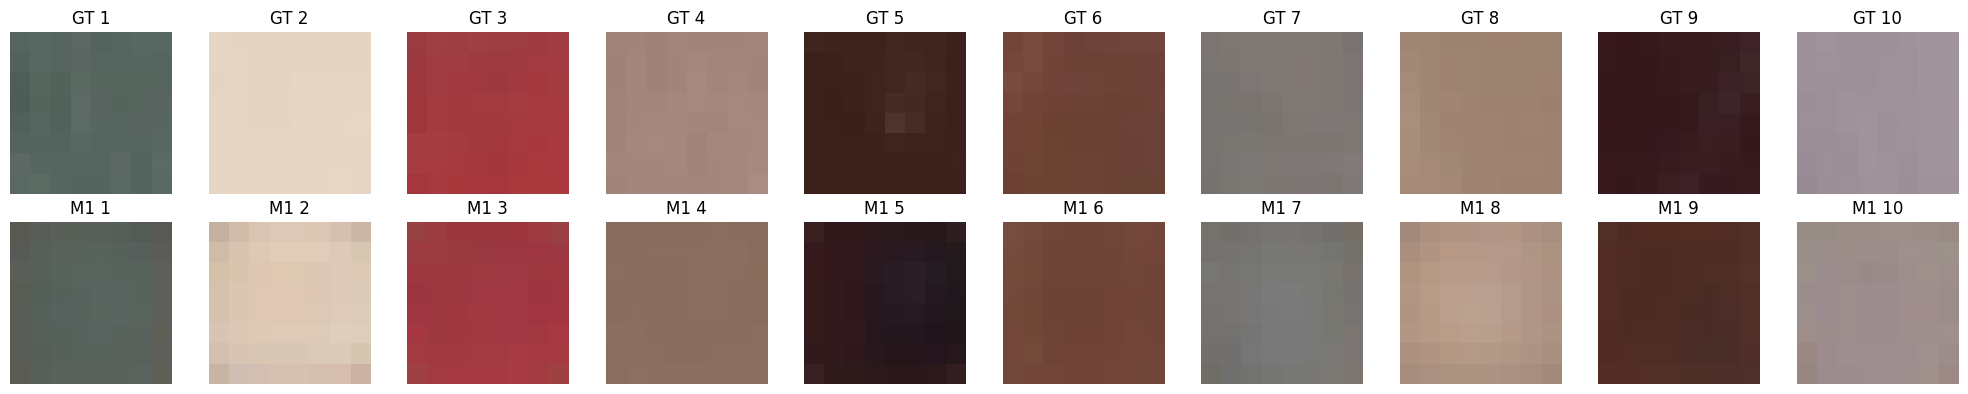

In [30]:
groundtruth_folder_path = file_path+ "Testing/portion only/color test gt/"
gt_files = sorted(os.listdir(groundtruth_folder_path))

out_methods_folder_path = file_path+ "Testing/portion only/color test out/"
out_files = sorted(os.listdir(out_methods_folder_path))

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))

method  = 1

for index in range(1,len(gt_files)+1):
    gt_path = groundtruth_folder_path + str(index) + '_output.png'
    out_path_1 = out_methods_folder_path + 'Method_' + str(method) +'_' + str(index) + '_input.png'

    gt_image = Image.open(gt_path)
    out_image_1 = Image.open(out_path_1)

    # Plot ground truth image
    ax_gt = axes[0, index-1]
    ax_gt.imshow(gt_image)
    ax_gt.axis('off')
    ax_gt.set_title(f'GT {index}')

    # Plot output image
    ax_out = axes[1, index-1]
    ax_out.imshow(out_image_1)
    ax_out.axis('off')
    ax_out.set_title(f'M1 {index}')

# Adjust layout
plt.tight_layout()
plt.show()
